In [62]:
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [63]:
df =pd.read_csv("C:/Users/03312360099/Downloads/daily-total-female-births - daily-total-female-births.csv")
df

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


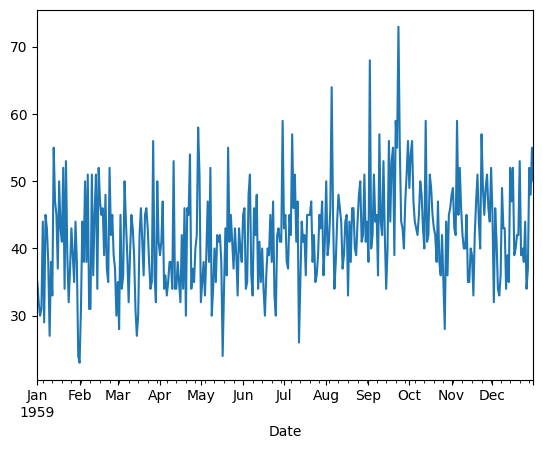

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Births, dtype: int64

In [64]:
series1 = pd.read_csv("C:/Users/03312360099/Downloads/daily-total-female-births - daily-total-female-births.csv", header=0,parse_dates=[0], index_col=0, squeeze=True)
series1.plot()
plt.show()
series1.head()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: Births, dtype: float64

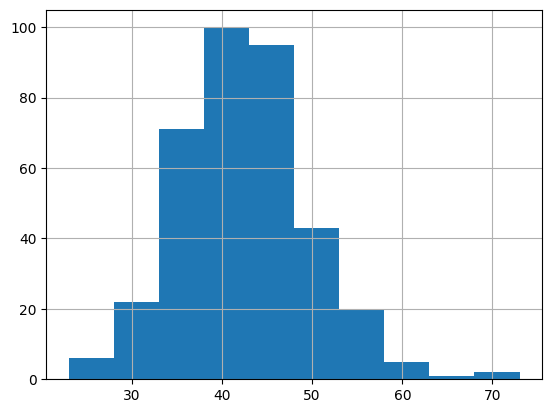

In [65]:
series1.hist()
series1.describe()

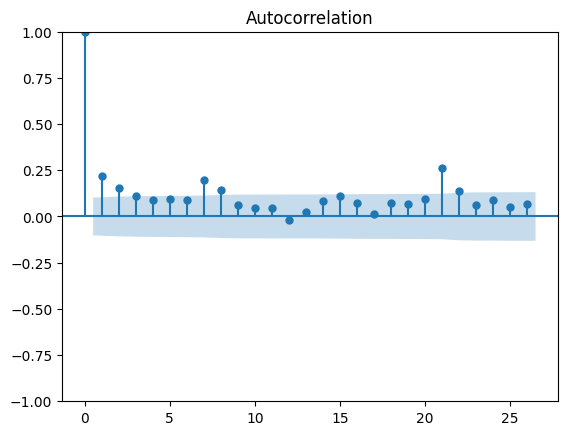

In [71]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series1)
plt.show()

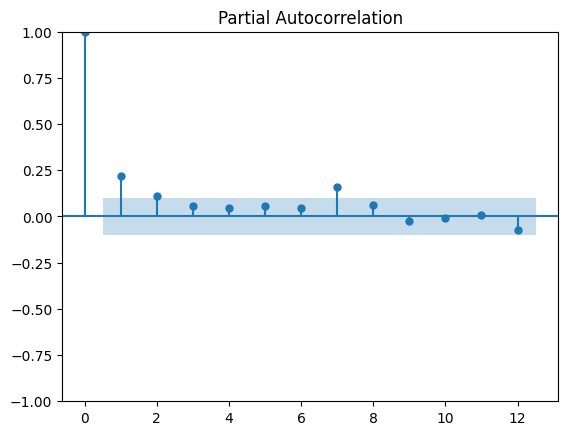

In [72]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series1, lags=12)
plt.show()

In [73]:
X=series1.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=39.763736, mean2=44.185792
variance1=49.213410, variance2=48.708651


In [74]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0]>0.05:
    print('Series is not Stationary')
else:
    print("Series is stationary")

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571
Series is stationary


In [75]:
result

(-4.808291253559764,
 5.2434129901498554e-05,
 6,
 358,
 {'1%': -3.448748905151901,
  '5%': -2.8696473721448728,
  '10%': -2.5710891239349585},
 2343.8290926464197)

In [76]:
df2 = pd.read_csv("C:/Users/03312360099/Downloads/airline-passengers - airline-passengers.csv")
df2

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


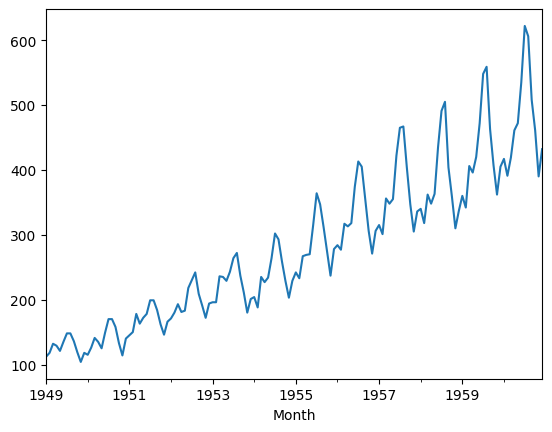

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Passengers, dtype: int64

In [77]:
series2 =pd.read_csv("C:/Users/03312360099/Downloads/airline-passengers - airline-passengers.csv", header=0,parse_dates=[0], index_col=0, squeeze=True)
series2.plot()
plt.show()
series2.head()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: Passengers, dtype: float64

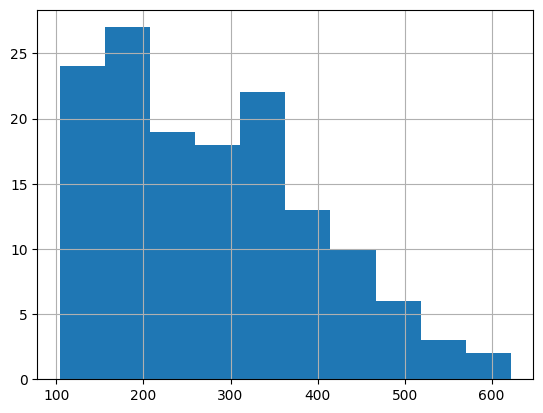

In [78]:
series2.hist()
series2.describe()

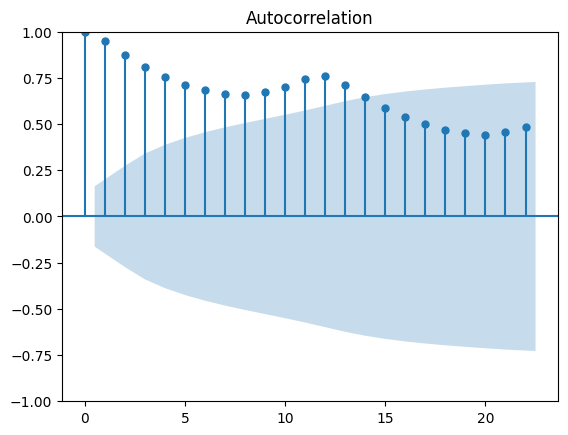

In [79]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series2)
plt.show()

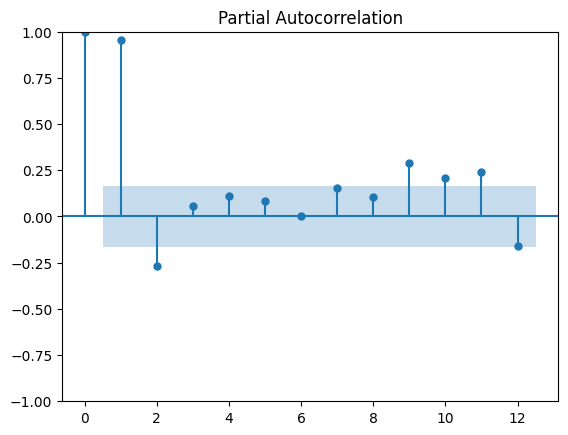

In [80]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series2, lags=12)
plt.show()

In [81]:
X=series2.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=182.902778, mean2=377.694444
variance1=2244.087770, variance2=7367.962191


In [82]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))
if result[0]>0.05:
  print('Series is not Stationary')
else:
  print("Series is stationary")

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
Series is not Stationary


In [83]:
from statsmodels.tsa.stattools import kpss

In [84]:
results= kpss(X)
print(results)

(1.6513122354165206, 0.01, 8, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


In [85]:
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, regression='ct')
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

In [86]:
kpss_test(X)

KPSS Statistic: 0.09614984853532682
p-value: 0.1
num lags: 4
Critial Values:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Result: The series is stationary


In [87]:
Xd= np.diff(X)

In [88]:
print(Xd)

[   6   14   -3   -8   14   13    0  -12  -17  -15   14   -3   11   15
   -6  -10   24   21    0  -12  -25  -19   26    5    5   28  -15    9
    6   21    0  -15  -22  -16   20    5    9   13  -12    2   35   12
   12  -33  -18  -19   22    2    0   40   -1   -6   14   21    8  -35
  -26  -31   21    3  -16   47   -8    7   30   38   -9  -34  -30  -26
   26   13   -9   34    2    1   45   49  -17  -35  -38  -37   41    6
   -7   40   -4    5   56   39   -8  -50  -49  -35   35    9  -14   55
   -8    7   67   43    2  -63  -57  -42   31    4  -22   44  -14   15
   72   56   14 -101  -45  -49   27   23  -18   64  -10   24   52   76
   11  -96  -56  -45   43   12  -26   28   42   11   63   87  -16  -98
  -47  -71   42]


In [89]:
print(len(X))

144


In [90]:
kpss_test(Xd, regression='ct')

KPSS Statistic: 0.024129891634650683
p-value: 0.1
num lags: 7
Critial Values:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Result: The series is stationary
